In [456]:
# Importing required libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [457]:
import warnings
warnings.filterwarnings('ignore')

# Loading the data set & Understanding the Basics

In [458]:
## Read the data 
bikeshare = pd.read_csv("day.csv")
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [459]:
bikeshare.shape

(730, 16)

In [460]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [461]:
# Checking null values
bikeshare.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [462]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Cleaning the data

In [463]:
# Dropping column instant as it has no effect on target column, and dteday as we have already mnth and weekday columns
drop_col=['instant','dteday','casual','registered']


for i in bikeshare.columns:
    if i in drop_col:
        bikeshare.drop(labels=i,axis=1,inplace=True)
#Checking if the changes happened        
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [464]:
bikeshare.shape

(730, 12)

In [465]:
bikeshare.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Transforming columns : Seasons, Weathersit, Mnth & weekday
1) Season : season (1:spring, 2:summer, 3:fall, 4:winter)

2) Weathersit : - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
3) Mnth : month ( 1 to 12)

4) Weekday : day of the week

In [466]:
# Season column conversion to categorical.
bikeshare.season = bikeshare.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
bikeshare.season.unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [467]:
#transforming weathersit column
bikeshare['weathersit']=bikeshare['weathersit'].map({1:'Clear_to_Partly_Cloudy', 2:'Misty_and_Cloudy', 3:'Light_rain_and_Snow', 4:'Heavy_Rain_or_Snow'})

#Transforming the mnth column
bikeshare['mnth']=bikeshare['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

#Transforming weekdays column
bikeshare['weekday']=bikeshare['weekday'].map({0:'Tues',1:'Wed',2:'Thurs',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})

#Checking the data 
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,Misty_and_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,0,Misty_and_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear_to_Partly_Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear_to_Partly_Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear_to_Partly_Cloudy,9.305237,11.46350,43.6957,12.522300,1600


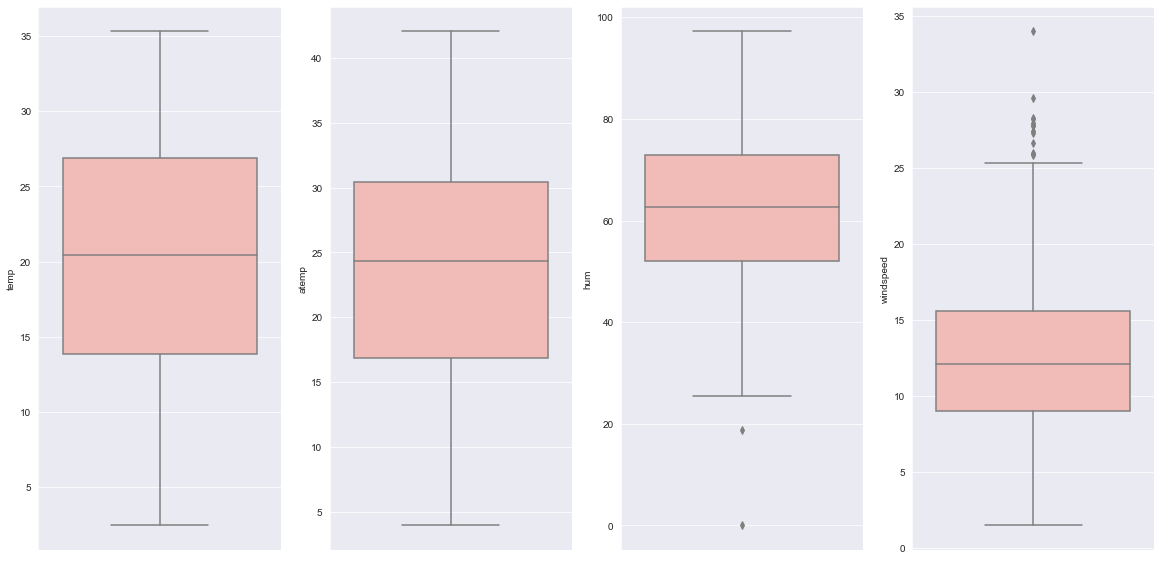

In [468]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.boxplot(y='temp', data=bikeshare, palette='Pastel1')
plt.subplot(1,4,2)
sns.boxplot(y='atemp', data=bikeshare, palette='Pastel1')
plt.subplot(1,4,3)
sns.boxplot(y='hum', data=bikeshare, palette='Pastel1')
plt.subplot(1,4,4)
sns.boxplot(y='windspeed', data=bikeshare, palette='Pastel1')
plt.show()

# Exploratory Data Analysis

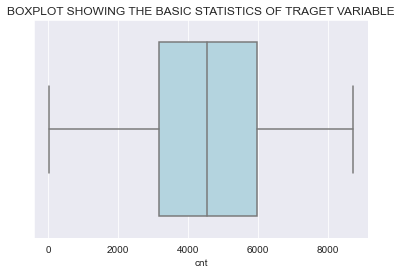

In [469]:
#Doing the basic analysis of the traget variable CNT
#Plot1
sns.boxplot(x='cnt' , data = bikeshare , color='Lightblue')
plt.title('Boxplot showing the basic statistics of traget variable'.upper())
plt.show()


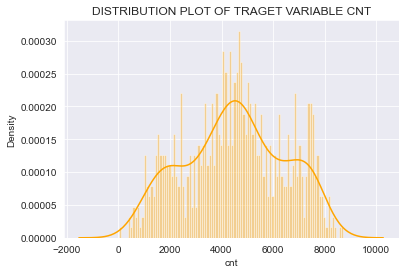

In [470]:
#plot2
sns.set_style('darkgrid')
sns.distplot(bikeshare['cnt'] , bins = 100 , color = 'orange')
plt.title('Distribution plot of traget variable cnt'.upper())
plt.show()

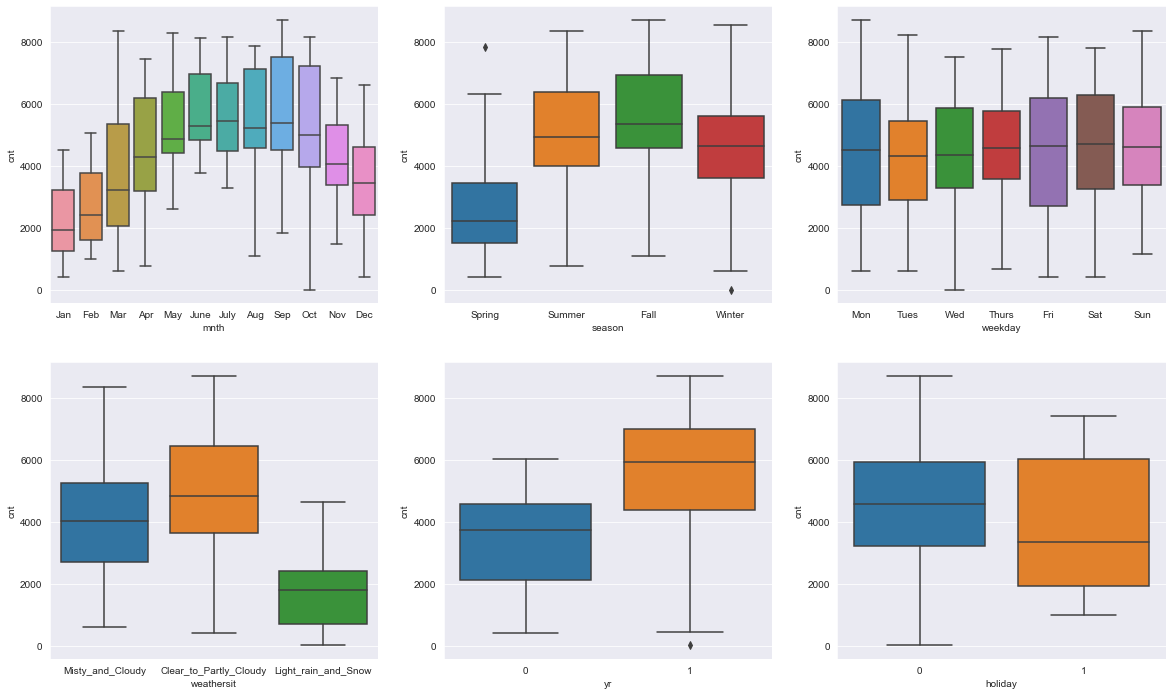

In [471]:
#Doing the analysis of the Categorical columns and check how the predictor values affect the traget variable 

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeshare)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeshare)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeshare)
plt.show()

# Conclusion:
1) In the month graph Count is highest in the month of July

2) In Season Variable for category 3:Fall has the highest median that shows that the demand is highest around that season

3) In weekday graph the demand for the bike is seen to be completely constant

4) In weathersit graph we can see that the bike demand betwwen 4000~5500 when the weather is Clear

5) In the year graph the demand for bike is higher in 2019 then compared to 2018

6) In the holiday graph deamnd decreases when its a holiday

# Visualising the numeric vars

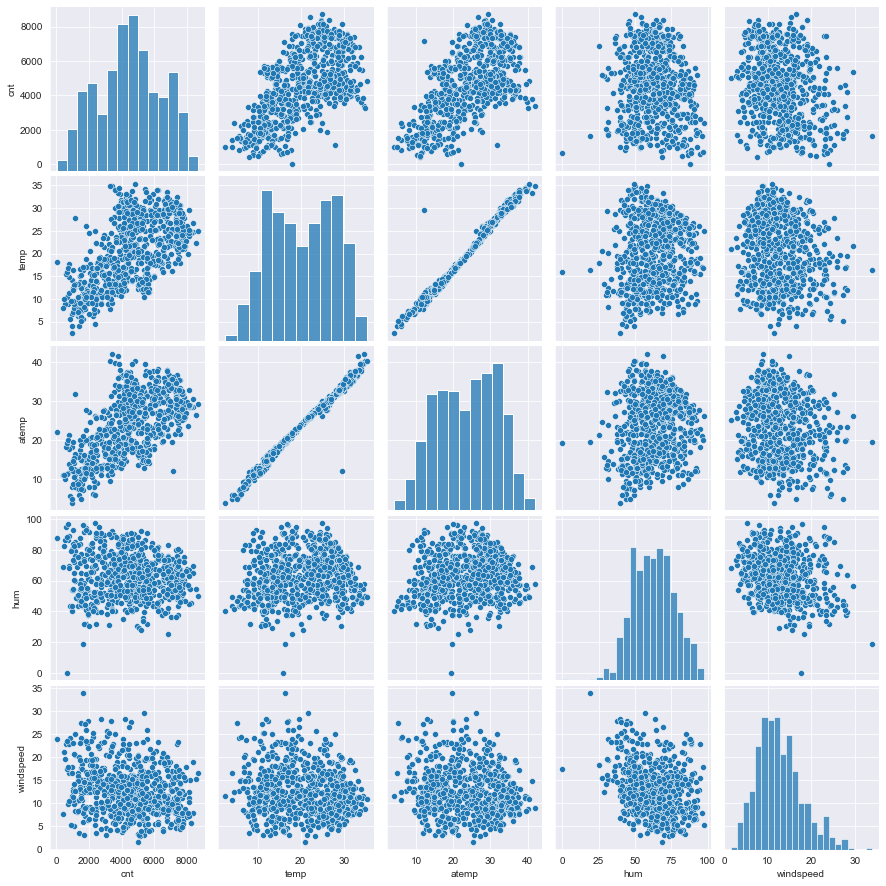

In [472]:
#Doing the analysis of the Numeric columns of the data set 
sns.pairplot(data = bikeshare, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

# Conclusion:
1)Looks like the temp and atemp has the highest corelation with the target variable cnt

2)temp and atemp are highly co-related with each other

<AxesSubplot:>

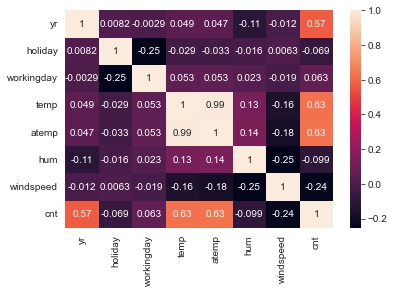

In [473]:
# Checking correlation
sns.heatmap(bikeshare.corr(), annot=True)

In [474]:
#Dropping the column atemp
bikeshare.drop('atemp',axis=1,inplace=True)

In [475]:
#Checking the changes 
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,Misty_and_Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,0,Misty_and_Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear_to_Partly_Cloudy,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear_to_Partly_Cloudy,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear_to_Partly_Cloudy,9.305237,43.6957,12.522300,1600


In [476]:
bikeshare.shape

(730, 11)

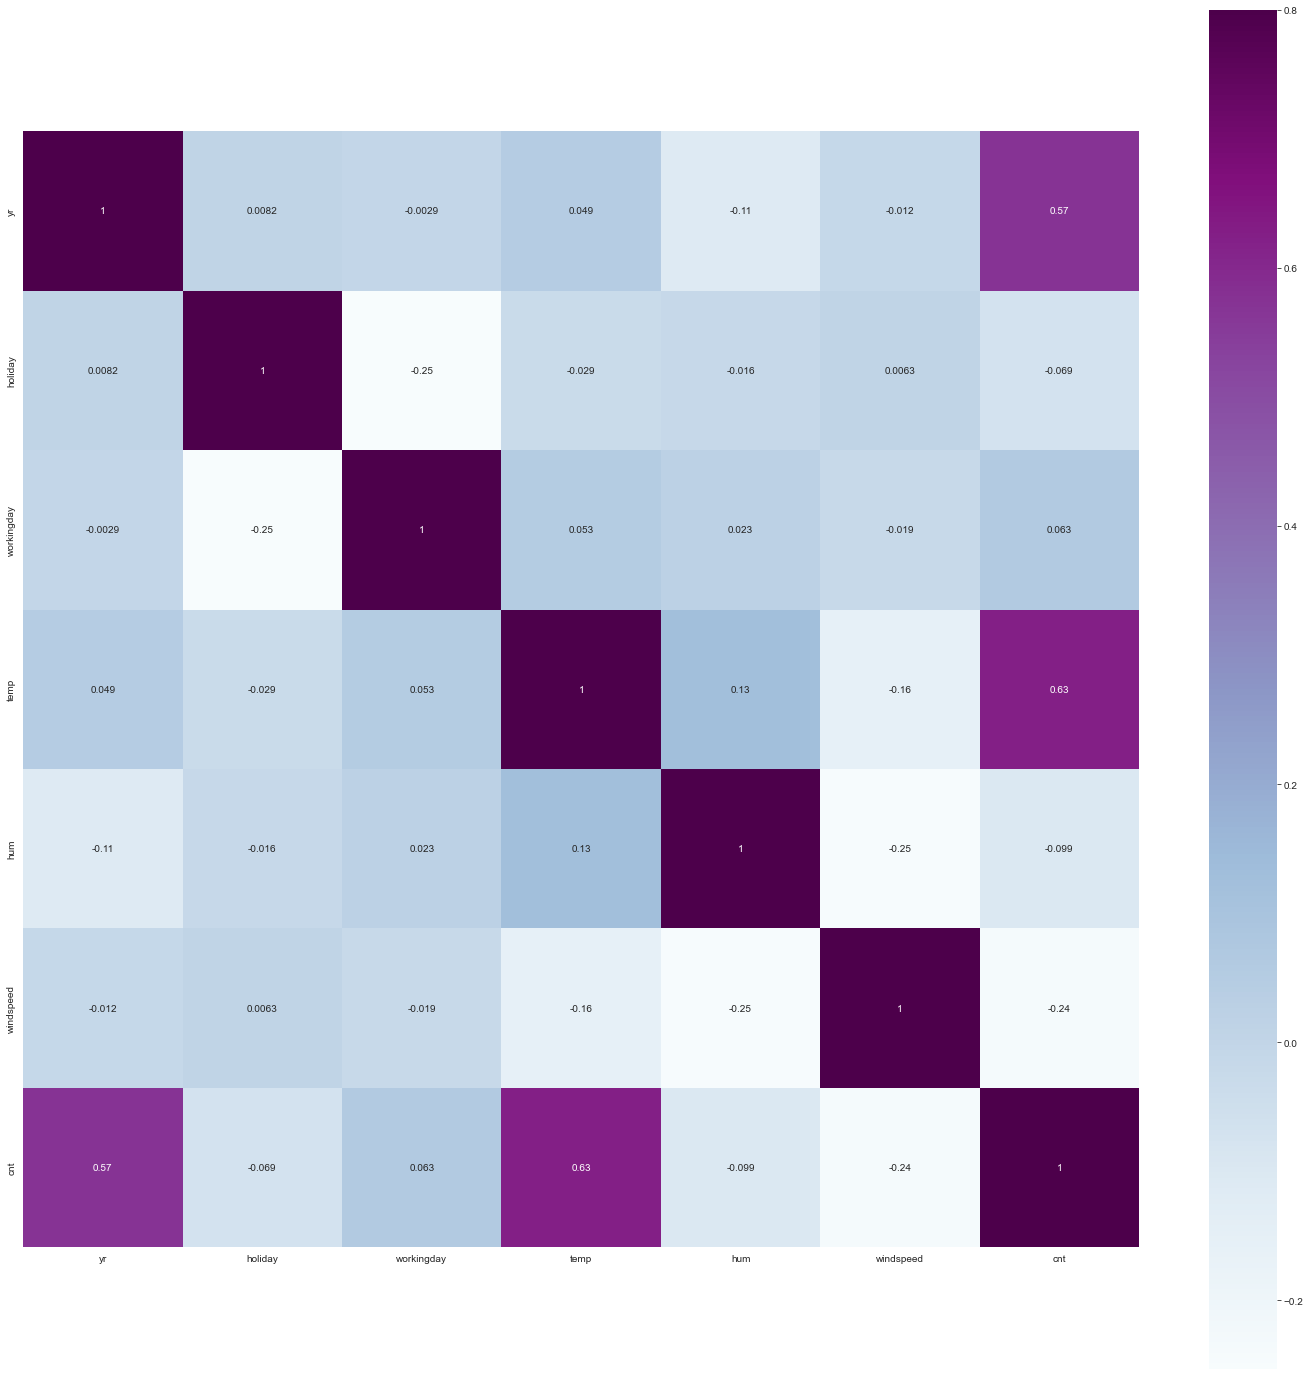

In [477]:
bike_cor=bikeshare.corr()
plt.figure(figsize=(25,25))
sns.heatmap(bike_cor, vmax=.8,square=True,annot=True, cmap="BuPu")
plt.show()

# Data Preparation

* Creating Dummy variables

In [478]:
bikeshare.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [479]:
dummie_for_season=pd.get_dummies(bikeshare['season'], drop_first=True)
dummie_for_mnth=pd.get_dummies(bikeshare['mnth'], drop_first=True)
dummie_for_weekday=pd.get_dummies(bikeshare['weekday'], drop_first=True)
dummie_for_weathersit=pd.get_dummies(bikeshare['weathersit'], drop_first=True)

In [480]:
dummie_for_season

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [481]:
dummie_for_mnth

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [482]:
dummie_for_weekday

,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,1,0,0,0,0
726,0,0,1,0,0,0
727,1,0,0,0,0,0
728,0,0,0,0,1,0


In [483]:
dummie_for_weathersit

,Light_rain_and_Snow,Misty_and_Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [484]:
# Checking how the dataset looks with dummies
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,Misty_and_Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,0,Misty_and_Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear_to_Partly_Cloudy,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear_to_Partly_Cloudy,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear_to_Partly_Cloudy,9.305237,43.6957,12.522300,1600


In [485]:
print(bikeshare.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [486]:
bikeshare.shape

(730, 11)

In [487]:
bikeshare = pd.concat([bikeshare,dummie_for_season,dummie_for_mnth,dummie_for_weekday,dummie_for_weathersit], axis=1)
bikeshare

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_rain_and_Snow,Misty_and_Cloudy
0,Spring,0,Jan,0,Mon,0,Misty_and_Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tues,0,Misty_and_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wed,1,Clear_to_Partly_Cloudy,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thurs,1,Clear_to_Partly_Cloudy,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear_to_Partly_Cloudy,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Sat,1,Misty_and_Cloudy,10.420847,65.2917,23.458911,...,0,0,0,1,0,0,0,0,0,1
726,Spring,1,Dec,0,Sun,1,Misty_and_Cloudy,10.386653,59.0000,10.416557,...,0,0,0,0,1,0,0,0,0,1
727,Spring,1,Dec,0,Mon,0,Misty_and_Cloudy,10.386653,75.2917,8.333661,...,0,0,1,0,0,0,0,0,0,1
728,Spring,1,Dec,0,Tues,0,Clear_to_Partly_Cloudy,10.489153,48.3333,23.500518,...,0,0,0,0,0,0,1,0,0,0


In [488]:
drop_cols = ['season','mnth','weekday','weathersit']
bikeshare.drop(drop_cols, axis=1, inplace=True)

In [489]:
bikeshare

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_rain_and_Snow,Misty_and_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,1,0,0,0,0,0,1
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,1,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0


# MODEL BUILDING

## Splitting the Data Set into Train & Test

In [490]:
#Train Test split with 80:20 ratio
train, test = train_test_split(bikeshare, train_size = 0.7, test_size = 0.3, random_state = 100)

In [491]:
train.shape

(510, 29)

In [492]:
test.shape

(219, 29)

# ReScaling the feature

* We can see that the cnt has very high values in comparision to other features that is why we have to rescake the variables so we can have a comparable scale .

* If we do not have a compareable scale some of the coefficients fitting in the regression model maybe too high or too low in comaparision to other coefficients.

* And this will make juding the model evaluation very difficult.

* Therefore we will use Min-Max Scaling to normalise the units of the coefficients and get them on the same scale

In [493]:
# Scaling the model
scaled_var = ['temp','hum','windspeed','cnt']

In [494]:
scaler = MinMaxScaler()

In [495]:
#Fit and transform training set only
train[scaled_var] = scaler.fit_transform(train[scaled_var])

In [496]:
train[scaled_var]

,temp,hum,windspeed,cnt
653,0.509887,0.575354,0.300794,0.864243
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
...,...,...,...,...
526,0.824514,0.605840,0.355596,0.764151
578,0.863973,0.679690,0.187140,0.832835
53,0.202618,0.435939,0.111379,0.218017
350,0.248216,0.577930,0.431816,0.312586


In [497]:
train[scaled_var].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


# Dividing into X_train and Y_train Sets for Model Buliding

In [498]:
y_train = train.pop('cnt')
X_train = train

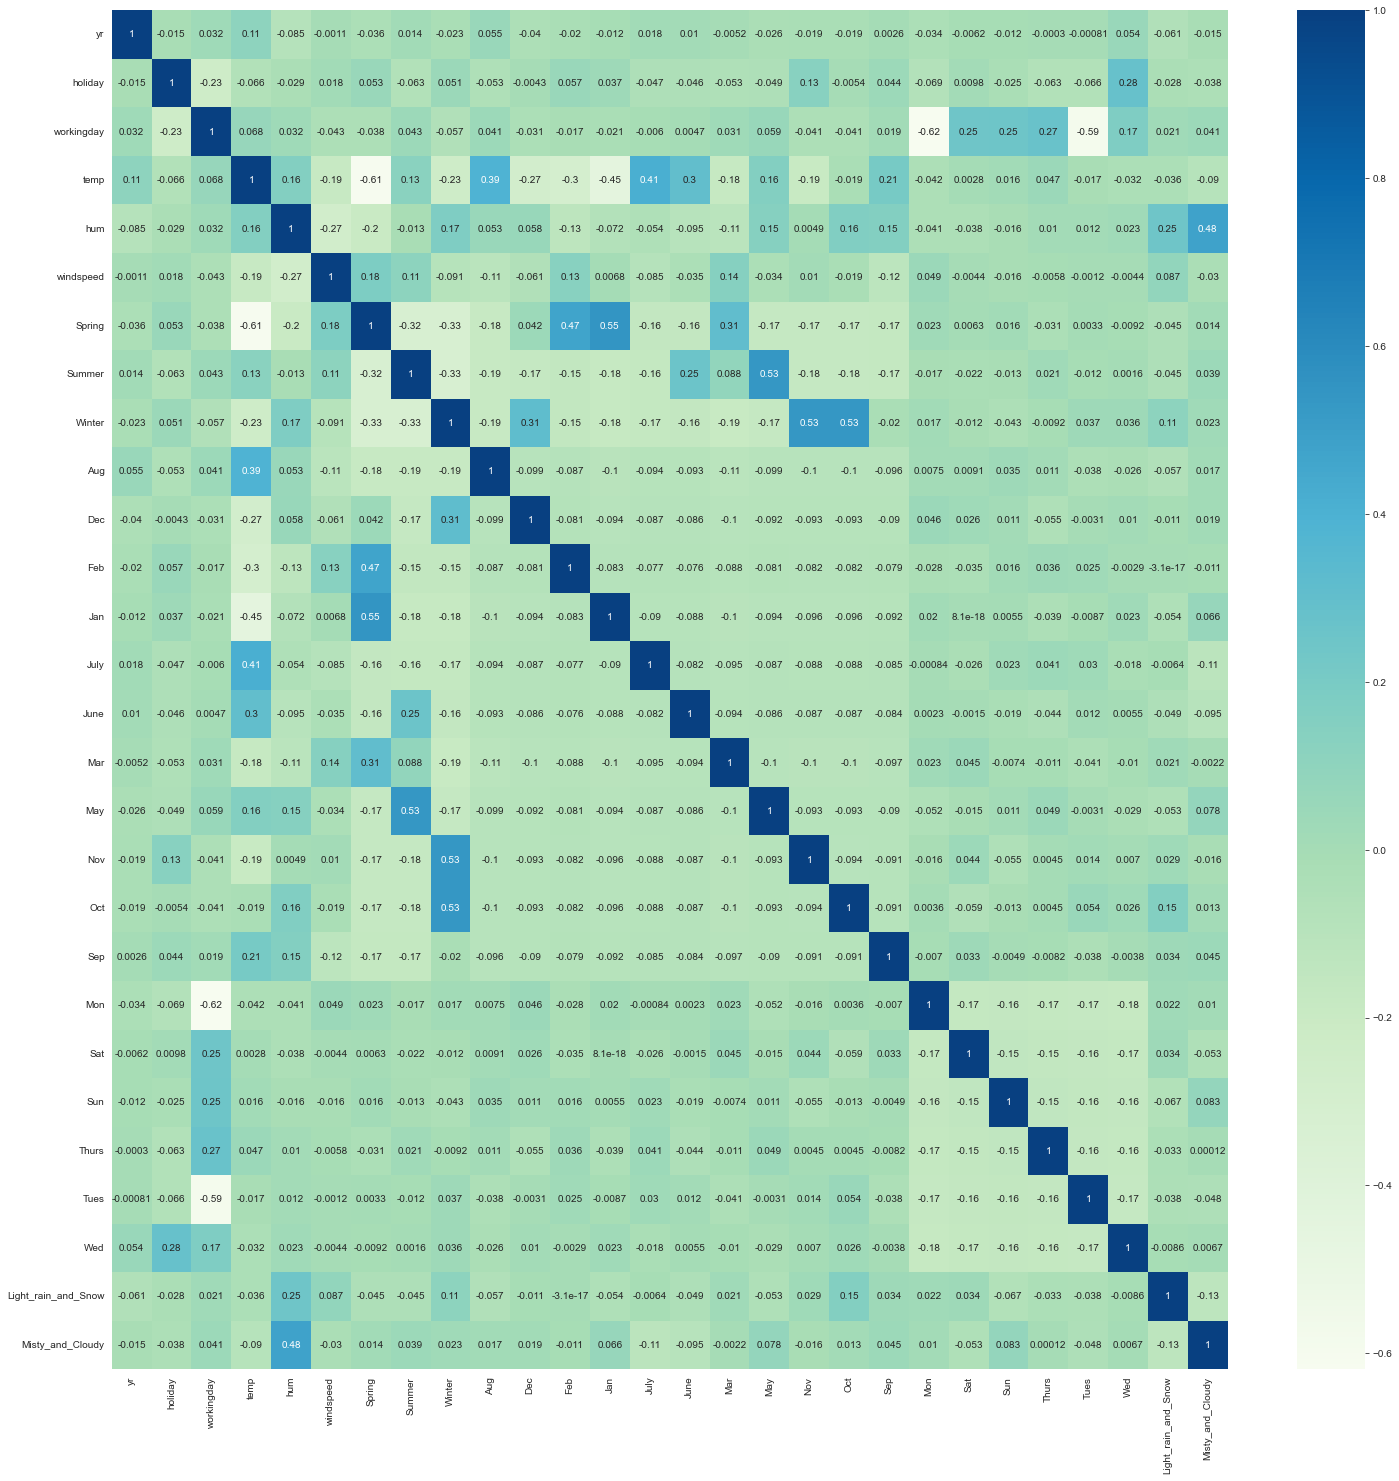

In [499]:
# Let's check the correlation coefficients to see which variables are highly correlated
#HeatMap
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(), annot=True, cmap='GnBu')
plt.show()

We can see that few variables are positively correlated and this can be good for us to build a regression model

# Building The Linear Model
* Approach used is MIXED to build the model

* RFE is used for Feature selection

* Statsmodel for Building the model

In [500]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_rain_and_Snow,Misty_and_Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [501]:
# We have already imported the required libraries
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [502]:
# running RFE
rfe = RFE(lm, n_features_to_select=15, step=0.3)             
rfe = rfe.fit(X_train, y_train)

In [503]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 2),
 ('Winter', True, 1),
 ('Aug', False, 3),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 3),
 ('Mar', False, 3),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 3),
 ('Sun', False, 3),
 ('Thurs', False, 3),
 ('Tues', False, 2),
 ('Wed', False, 3),
 ('Light_rain_and_Snow', True, 1),
 ('Misty_and_Cloudy', True, 1)]

In [504]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec',
       'Jan', 'July', 'Nov', 'Sep', 'Mon', 'Light_rain_and_Snow',
       'Misty_and_Cloudy'],
      dtype='object')

In [505]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Summer', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct',
       'Sat', 'Sun', 'Thurs', 'Tues', 'Wed'],
      dtype='object')

# Building Statsmodel

In [506]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable
* For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by defaul

In [507]:
#Adding a constant var
X_train_rfe = sm.add_constant(X_train_rfe)

In [508]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [509]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.93e-188
Time:                        23:17:42   Log-Likelihood:                 512.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     494   BIC:                            -925.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3623    

In [510]:
X_train_rfe.iloc[:,1:]

,yr,holiday,temp,hum,windspeed,Spring,Winter,Dec,Jan,July,Nov,Sep,Mon,Light_rain_and_Snow,Misty_and_Cloudy
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,1,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.605840,0.355596,0,0,0,0,0,0,0,0,0,1
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,1,1,0,0,0,0,1,0,1


In [511]:
# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe.iloc[:,1:]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.57
2,temp,16.88
4,windspeed,4.10
6,Winter,2.98
5,Spring,2.94
14,Misty_and_Cloudy,2.26
0,yr,2.07
10,Nov,1.82
8,Jan,1.75
7,Dec,1.54


* We can drop weathersit_Pleasant as it shows infinte VIF which show multicolinearity

In [512]:
# Dropping the hum column
X_train_new = X_train_rfe.drop(["hum"], axis = 1)
X_train_new

,const,yr,holiday,temp,windspeed,Spring,Winter,Dec,Jan,July,Nov,Sep,Mon,Light_rain_and_Snow,Misty_and_Cloudy
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.663106,1,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,0,0,0,0,0,1
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,1,0,0,0,0,1,0,1


In [513]:
X_train_new.drop('const', axis=1, inplace=True)
X_train_new

,yr,holiday,temp,windspeed,Spring,Winter,Dec,Jan,July,Nov,Sep,Mon,Light_rain_and_Snow,Misty_and_Cloudy
653,1,0,0.509887,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,1,0,1
728,1,0,0.245101,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.355596,0,0,0,0,0,0,0,0,0,1
578,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,1,0,0,0,0,1,0,1


In [514]:
# Creating X_test dataframe after dropping the weathersit_Pleasant
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.00e-186
Time:                        23:17:42   Log-Likelihood:                 504.94
No. Observations:                 510   AIC:                            -979.9
Df Residuals:                     495   BIC:                            -916.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2865    

In [515]:
X_train_new.iloc[:,1:]

,holiday,temp,windspeed,Spring,Winter,Dec,Jan,July,Nov,Sep,Mon,Light_rain_and_Snow,Misty_and_Cloudy
653,0,0.509887,0.300794,0,1,0,0,0,0,0,0,0,0
576,0,0.815169,0.264686,0,0,0,0,1,0,0,0,0,0
426,0,0.442393,0.255342,1,0,0,0,0,0,0,1,0,1
728,0,0.245101,0.663106,1,0,1,0,0,0,0,0,0,0
482,0,0.395666,0.188475,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,0.824514,0.355596,0,0,0,0,0,0,0,0,0,1
578,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0.248216,0.431816,0,1,1,0,0,0,0,1,0,1


In [516]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.70
3,windspeed,4.08
5,Winter,2.54
4,Spring,2.37
0,yr,2.07
9,Nov,1.80
7,Jan,1.65
13,Misty_and_Cloudy,1.53
6,Dec,1.46
8,July,1.36


* We can drop weekday_Sunday as it is negative coefficient and high p-value

In [517]:
X_train_new

,yr,holiday,temp,windspeed,Spring,Winter,Dec,Jan,July,Nov,Sep,Mon,Light_rain_and_Snow,Misty_and_Cloudy
653,1,0,0.509887,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,1,0,1
728,1,0,0.245101,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.355596,0,0,0,0,0,0,0,0,0,1
578,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,1,0,0,0,0,1,0,1


In [518]:
# Dropping the Mon column
X_train_new = X_train_new.drop(["Mon"], axis = 1)

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit()   

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.08e-186
Time:                        23:17:43   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2893    

In [519]:
X_train_new.iloc[:,1:]

,yr,holiday,temp,windspeed,Spring,Winter,Dec,Jan,July,Nov,Sep,Light_rain_and_Snow,Misty_and_Cloudy
653,1,0,0.509887,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.663106,1,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.355596,0,0,0,0,0,0,0,0,1
578,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,1,0,0,0,0,0,1


In [520]:
vif = pd.DataFrame()
X = X_train_new.iloc[:,1:]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,Winter,2.54
4,Spring,2.36
0,yr,2.06
9,Nov,1.80
7,Jan,1.65
12,Misty_and_Cloudy,1.53
6,Dec,1.46
8,July,1.36


# Residual Analysis of Train Data set
* We will plot the Histogram of the error terms and see how the graph looks like

In [521]:
y_train_cnt = lm.predict(X_train_new)

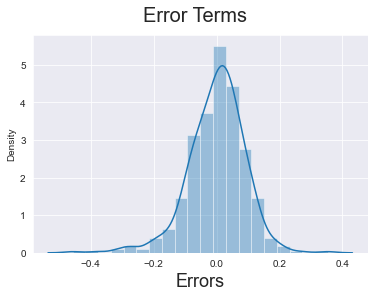

In [522]:
# Plot the histogram of the error terms to check the normality of the errors
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### Observations:
* Error terms are centered at 0 AND have a Normal Distribution

## Prediction and Evaluation on TEST Data set
* As the model is fitted and we have also checked the normality of the errors . Now we can make the final prediction on our Test Data set

In [523]:
num_vars = ['temp', 'hum', 'windspeed','cnt']
test[num_vars] = scaler.transform(test[num_vars])

In [524]:
test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_rain_and_Snow,Misty_and_Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [525]:
test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Light_rain_and_Snow,Misty_and_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [526]:
y_test = test.pop('cnt')
X_test = test

In [527]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Running the linear model
lm = sm.OLS(y_test,X_test_new).fit()

In [528]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [529]:
vif = pd.DataFrame()
X = X_train_new.iloc[:,1:]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,Winter,2.54
4,Spring,2.36
0,yr,2.06
9,Nov,1.80
7,Jan,1.65
12,Misty_and_Cloudy,1.53
6,Dec,1.46
8,July,1.36


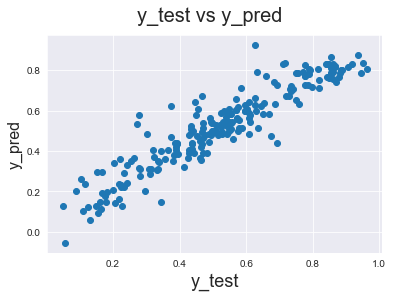

In [530]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

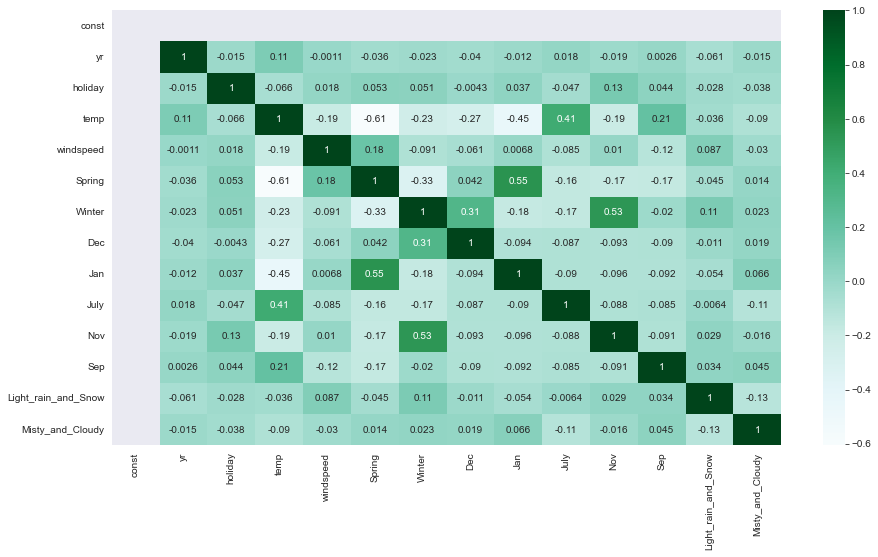

In [531]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="BuGn")
plt.show()

# Homoscedasticity

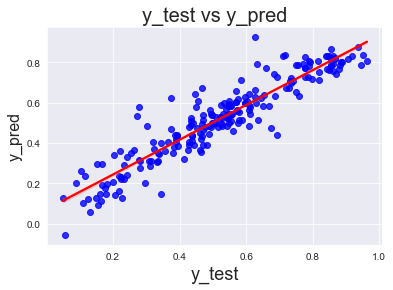

In [533]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [451]:
r2 = r2_score(y_test, y_pred)
r2

0.8618159639222054